<a href="https://colab.research.google.com/github/nidhik5/Sign_to_text/blob/main/Sign_to_text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
train=pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/mpr_sign/sign_mnist_train/sign_mnist_train.csv")

In [ ]:
test=pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/mpr_sign/sign_mnist_test/sign_mnist_test.csv")

In [ ]:
train.shape

(27455, 785)

In [ ]:
y_train=train['label']
x_train=train.drop(['label'],axis=1)
x_test=test.drop(['label'],axis=1)
y_test=test['label']

In [ ]:
import numpy as np

x_train = x_train.values / 255.0
x_test = x_test.values/ 255.0

# Assuming x_train and x_test are DataFrames
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

Text(0.5, 1.0, '6')

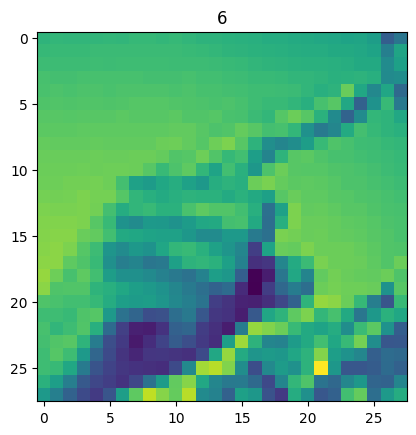

In [ ]:
plt.imshow(x_train[1].reshape(28,28))
plt.title(f"{y_train[1]}")

In [ ]:
y_train.unique()

array([ 3,  6,  2, 13, 16,  8, 22, 18, 10, 20, 17, 19, 21, 23, 24,  1, 12,
       11, 15,  4,  0,  5,  7, 14])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=False,
)
datagen.fit(x_train)

Text(0.5, 1.0, '3')

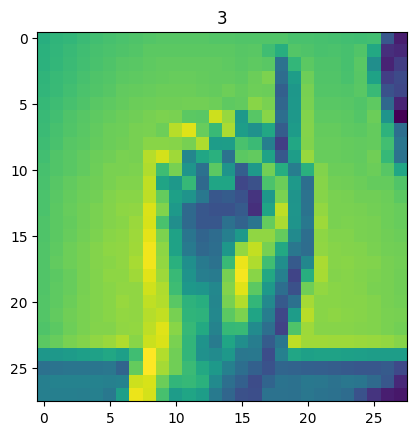

In [ ]:
plt.imshow(x_train[8].reshape(28,28))
plt.title(f"{y_train[8]}")

In [ ]:
from sklearn.preprocessing import LabelBinarizer
LB=LabelBinarizer()
y_train=LB.fit_transform(y_train)
y_test=LB.fit_transform(y_test)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from keras.callbacks import ModelCheckpoint

In [ ]:
from keras.callbacks import ReduceLROnPlateau

modelsave=ModelCheckpoint(r'C:\Users\Nidhi\Desktop\sem 4\model.h5',save_best_only=True, monitor='val_loss')
reduce_lr_loss=ReduceLROnPlateau(monitor='val_accuracy',patience=3,verbose=1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization, Dense, Dropout, Flatten
from tensorflow.keras import regularizers

model = Sequential()

model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(Dropout(0.3))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu',padding="same"))
model.add(Dropout(0.3))
model.add(MaxPool2D(pool_size=(2, 2)))


model.add(Flatten())

model.add(Dense(units=32, activation='relu',kernel_regularizer=regularizers.l2(0.1)))
model.add(Dropout(0.3))


model.add(Dense(units=32, activation='relu',kernel_regularizer=regularizers.l2(0.1)))
#model.add(Dropout(0.3)) last step before proper ans


# Modify the output layer to have 24 units (for 24 classes) and use 'softmax' activation for classification
model.add(Dense(units=24, activation="softmax"))




In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

In [ ]:
model.compile(optimizer = 'sgd' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test),callbacks=[reduce_lr_loss, early_stopping])

Epoch 1/50
858/858 [==============================] - 10s 12ms/step - loss: 4.9295 - accuracy: 0.3659 - val_loss: 2.2876 - val_accuracy: 0.7038 - lr: 0.0100
Epoch 2/50
858/858 [==============================] - 9s 11ms/step - loss: 1.3778 - accuracy: 0.7313 - val_loss: 1.4338 - val_accuracy: 0.8661 - lr: 0.0100
Epoch 3/50
858/858 [==============================] - 10s 11ms/step - loss: 1.0137 - accuracy: 0.8147 - val_loss: 1.1246 - val_accuracy: 0.9048 - lr: 0.0100
Epoch 4/50
858/858 [==============================] - 8s 10ms/step - loss: 0.8560 - accuracy: 0.8562 - val_loss: 1.0390 - val_accuracy: 0.9108 - lr: 0.0100
Epoch 5/50
858/858 [==============================] - 9s 11ms/step - loss: 0.7649 - accuracy: 0.8786 - val_loss: 0.9061 - val_accuracy: 0.9433 - lr: 0.0100
Epoch 6/50
858/858 [==============================] - 9s 10ms/step - loss: 0.6901 - accuracy: 0.8953 - val_loss: 0.8771 - val_accuracy: 0.9175 - lr: 0.0100
Epoch 7/50
858/858 [==============================] - 9s 11ms/

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_3 (Bat  (None, 28, 28, 1)         4         
 chNormalization)                                                
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 128)       1280      
                                                                 
 dropout_4 (Dropout)         (None, 28, 28, 128)       0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 128)       0         
 g2D)                                                            
                                                                 
 batch_normalization_4 (Bat  (None, 14, 14, 128)       512       
 chNormalization)                                                
                                                      

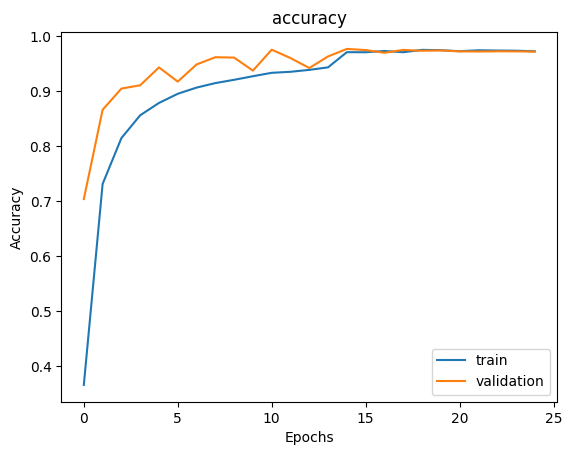

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(history.history["accuracy"],label="train");
plt.plot(history.history["val_accuracy"],label="validation");
plt.title("accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend()
plt.show()

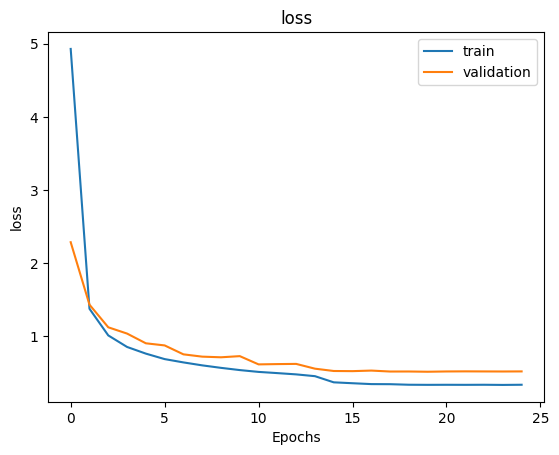

In [ ]:
plt.figure()
plt.plot(history.history["loss"],label="train");
plt.plot(history.history["val_loss"],label="validation");
plt.title("loss")
plt.ylabel("loss")
plt.xlabel("Epochs")
plt.legend()
plt.show()